In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
from traffic.core import Traffic

t = Traffic.from_file("../data/adsb_sample.parquet")
t

,count
flight_id,
AFR962_002,14321
AFR962_007,13811
AFR962_006,13431
AFR1044_003,10641
AFR21ZQ_005,3311
AFR16BR_004,3221
AFR21ZQ_000,3141
AFR21ZQ_001,3111


In [3]:
from feat import FlightProfiles

fps = FlightProfiles.from_traffic(t)
fps.to_df().head()

/home/luis/miniconda3/envs/traffic/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


,t,h,s,v,vs,id,fp
0,0,381.000,0.000000,88.998812,13.655040,AFR1044_003,CL
1,1,393.192,61.506604,88.998812,13.720064,AFR1044_003,CL
2,2,405.384,123.013264,88.998812,13.785088,AFR1044_003,CL
3,3,417.576,184.519979,88.998812,13.850112,AFR1044_003,CL
4,4,429.768,246.026751,88.998812,13.915136,AFR1044_003,CL


In [4]:
from feat import FuelEstimator

ac_types = ["A332", "E190", "A20N", "A21N", "A319", "A20N", "B772", "B789", "A359"]
fps = FlightProfiles.from_traffic(
    t.resample("10s").eval(desc="resampling", max_workers=8)
)
cumul = []
for ac_type, fp in zip(ac_types, fps):
    fe = FuelEstimator(ac_type=ac_type)
    cumul.append(fe([fp]).to_df())
flight_profiles = FlightProfiles(cumul, len(cumul))
fp_df = flight_profiles.to_df()
fp_df.head()

resampling:   0%|          | 0/8 [00:00<?, ?it/s]

Flight profiles:   0%|          | 0/1 [00:00<?, ?it/s]

Flight profiles:   0%|          | 0/1 [00:00<?, ?it/s]

Flight profiles:   0%|          | 0/1 [00:00<?, ?it/s]

Flight profiles:   0%|          | 0/1 [00:00<?, ?it/s]

Flight profiles:   0%|          | 0/1 [00:00<?, ?it/s]

Flight profiles:   0%|          | 0/1 [00:00<?, ?it/s]

Flight profiles:   0%|          | 0/1 [00:00<?, ?it/s]

Flight profiles:   0%|          | 0/1 [00:00<?, ?it/s]

,t,h,s,v,vs,id,fp,thr,ff,fc,m
0,0,381.00,0.000000,88.998812,13.65504,AFR1044_003,CL,0.000000,0.000000,0.000000,175023.589604
1,10,502.92,615.073600,88.998812,14.30528,AFR1044_003,CL,364465.211243,4.518051,45.180514,174978.409090
2,20,662.94,1379.476398,89.513256,17.23136,AFR1044_003,CL,363433.086374,4.541688,90.597399,174932.992205
3,30,845.82,2088.764063,87.455480,15.93088,AFR1044_003,CL,361387.520450,4.555472,136.152122,174887.437482
4,40,998.22,2792.437871,85.397704,15.28064,AFR1044_003,CL,360410.668183,4.577637,181.928488,174841.661116


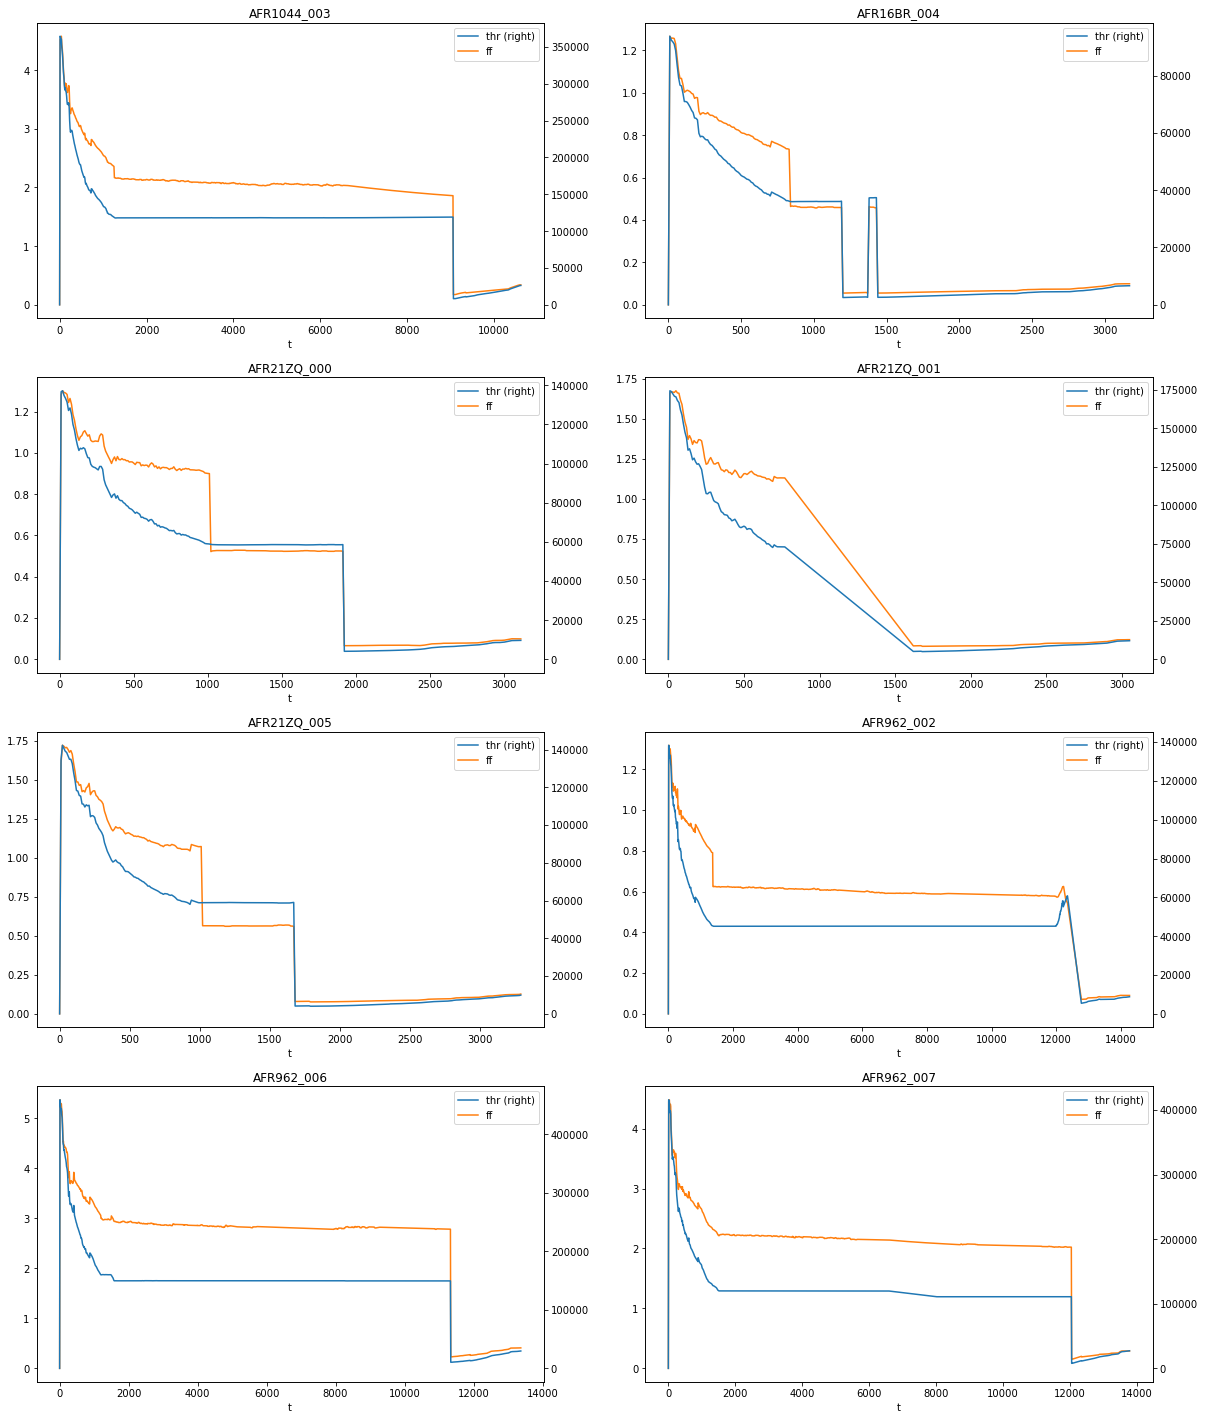

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 2, figsize=(20, 25))
for ax, (id, fp) in zip(axes.flat, fp_df.groupby("id")):
    ax.set_title(id)
    fp.query("ff==ff").plot(
        x="t",
        y=["thr", "ff"],
        secondary_y="thr",
        ax=ax,
        legend=True,
    )